In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble
import sklearn.svm
import sklearn.gaussian_process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
import sklearn.neural_network
import warnings
warnings.filterwarnings("ignore")

In [64]:
data = pd.read_csv('Parkinson_train_data.txt', sep=",", header=None)
print(data)

      0      1         2      3      4      5       6      7      8       9   \
0      1  1.488  0.000090  0.900  0.794  2.699   8.334  0.779  4.517   4.609   
1      1  0.728  0.000038  0.353  0.376  1.059   5.864  0.642  2.058   3.180   
2      1  1.220  0.000074  0.732  0.670  2.196   8.719  0.875  4.347   5.166   
3      1  2.502  0.000123  1.156  1.634  3.469  13.513  1.273  5.263   8.771   
4      1  3.509  0.000167  1.715  1.539  5.145   9.112  1.040  3.102   4.927   
...   ..    ...       ...    ...    ...    ...     ...    ...    ...     ...   
1035  40  5.127  0.000398  2.721  2.510  8.162   9.846  0.965  4.593   6.806   
1036  40  1.757  0.000133  0.808  0.690  2.425   7.571  0.740  2.720   3.927   
1037  40  2.912  0.000226  1.141  1.266  3.423  15.489  1.456  6.433  10.138   
1038  40  3.788  0.000275  1.786  1.484  5.359  15.702  1.367  6.374  11.094   
1039  40  1.809  0.000149  0.680  0.843  2.040   7.881  0.782  2.690   4.543   

      ...       19    20    21        2

In [65]:
test_data = pd.read_csv('test_data.txt', sep=",", header=None)
print(test_data)

     0      1         2      3      4      5      6      7      8      9   \
0     1  0.135  0.000007  0.067  0.078  0.202  2.033  0.178  1.074  1.336   
1     1  0.143  0.000007  0.073  0.081  0.219  1.236  0.107  0.612  0.904   
2     1  0.162  0.000008  0.087  0.089  0.260  1.338  0.117  0.630  0.948   
3     1  0.140  0.000007  0.075  0.089  0.224  1.086  0.094  0.556  0.747   
4     1  0.150  0.000007  0.080  0.097  0.240  1.049  0.091  0.533  0.698   
..   ..    ...       ...    ...    ...    ...    ...    ...    ...    ...   
163  28  0.257  0.000018  0.105  0.122  0.315  5.665  0.544  2.612  3.390   
164  28  0.311  0.000021  0.129  0.148  0.388  5.492  0.536  2.422  2.959   
165  28  0.434  0.000029  0.178  0.229  0.534  5.048  0.549  2.284  3.082   
166  28  0.464  0.000031  0.195  0.227  0.585  4.739  0.536  2.144  2.940   
167  28  0.474  0.000031  0.179  0.230  0.538  5.221  0.682  2.119  3.388   

     ...       18       19     20     21        22        23   24   25   26

In [66]:
data.describe()

0            1            2            3            4   \
count  1040.00000  1040.000000  1040.000000  1040.000000  1040.000000   
mean     20.50000     2.679523     0.000170     1.247053     1.348327   
std      11.54895     1.765053     0.000106     0.979462     1.138742   
min       1.00000     0.190000     0.000006     0.062000     0.081000   
25%      10.75000     1.507500     0.000095     0.617000     0.665750   
50%      20.50000     2.396000     0.000151     1.035500     1.126500   
75%      30.25000     3.411500     0.000229     1.602500     1.694750   
max      40.00000    14.376000     0.000777     8.016000    13.542000   

                5            6            7            8            9   ...  \
count  1040.000000  1040.000000  1040.000000  1040.000000  1040.000000  ...   
mean      3.741161    12.918391     1.194895     5.699600     7.983552  ...   
std       2.938443     5.452204     0.420071     3.015183     4.840892  ...   
min       0.185000     1.185000     0.103000     0.496000     0.708000  ...   
25%       1.851750     9.353500     0.941000     3.703000     5.160250  ...   
50%       3.107000    12.348500     1.181500     5.134500     7.050500  ...   
75%       4.808500    15.493250     1.411000     6.942000     9.558930  ...   
max      24.048000    41.137000     2.721000    25.820000    72.860000  ...   

                19           20           21           22           23  \
count  1040.000000  1040.000000  1040.000000  1040.000000  1040.000000   
mean    234.875990   109.744231   105.969231     0.006547     0.000843   
std     121.541243   150.027703   149.417074     0.001875     0.000723   
min      85.541000     0.000000     0.000000     0.002039     0.000055   
25%     143.650750    42.750000    40.750000     0.005039     0.000404   
50%     195.971000    65.000000    62.000000     0.006484     0.000644   
75%     263.798250   113.000000   109.000000     0.007923     0.000980   
max     597.974000  1490.000000  1489.000000     0.012070     0.006371   

                24           25           26           27           28  
count  1040.000000  1040.000000  1040.000000  1040.000000  1040.000000  
mean     27.682856     1.134615    12.370042    13.000000     0.500000  
std      20.975294     1.614764    15.161916    15.894745     0.500241  
min       0.000000     0.000000     0.000000     1.000000     0.000000  
25%       8.149250     0.000000     0.000000     1.000000     0.000000  
50%      26.501000     1.000000     5.826000     3.000000     0.500000  
75%      43.064250     1.000000    22.255500    23.250000     1.000000  
max      88.158000    12.000000    69.117000    55.000000     1.000000  

[8 rows x 29 columns]

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
0     1040 non-null int64
1     1040 non-null float64
2     1040 non-null float64
3     1040 non-null float64
4     1040 non-null float64
5     1040 non-null float64
6     1040 non-null float64
7     1040 non-null float64
8     1040 non-null float64
9     1040 non-null float64
10    1040 non-null float64
11    1040 non-null float64
12    1040 non-null float64
13    1040 non-null float64
14    1040 non-null float64
15    1040 non-null float64
16    1040 non-null float64
17    1040 non-null float64
18    1040 non-null float64
19    1040 non-null float64
20    1040 non-null int64
21    1040 non-null int64
22    1040 non-null float64
23    1040 non-null float64
24    1040 non-null float64
25    1040 non-null int64
26    1040 non-null float64
27    1040 non-null int64
28    1040 non-null int64
dtypes: float64(23), int64(6)
memory usage: 235.8 KB


In [68]:
#checking how the features are correlated with each other. It is best practise to check which
#features are more correlated with the target variable. The model will give more reliable output when we pass
#significant features into the model
correlations = data.corr()[28].drop(28)
print("Correaltion with target")
print(correlations)

Correaltion with target
0    -0.866296
1     0.097552
2     0.166999
3     0.111144
4     0.110934
5     0.111138
6     0.009062
7     0.027190
8    -0.018156
9    -0.022581
10    0.146326
11   -0.018158
12    0.081095
13   -0.076077
14    0.040507
15   -0.084222
16   -0.103270
17   -0.121074
18   -0.059104
19   -0.139398
20    0.041038
21    0.047103
22    0.081763
23   -0.058788
24   -0.122044
25   -0.079831
26   -0.126151
27    0.755330
Name: 28, dtype: float64


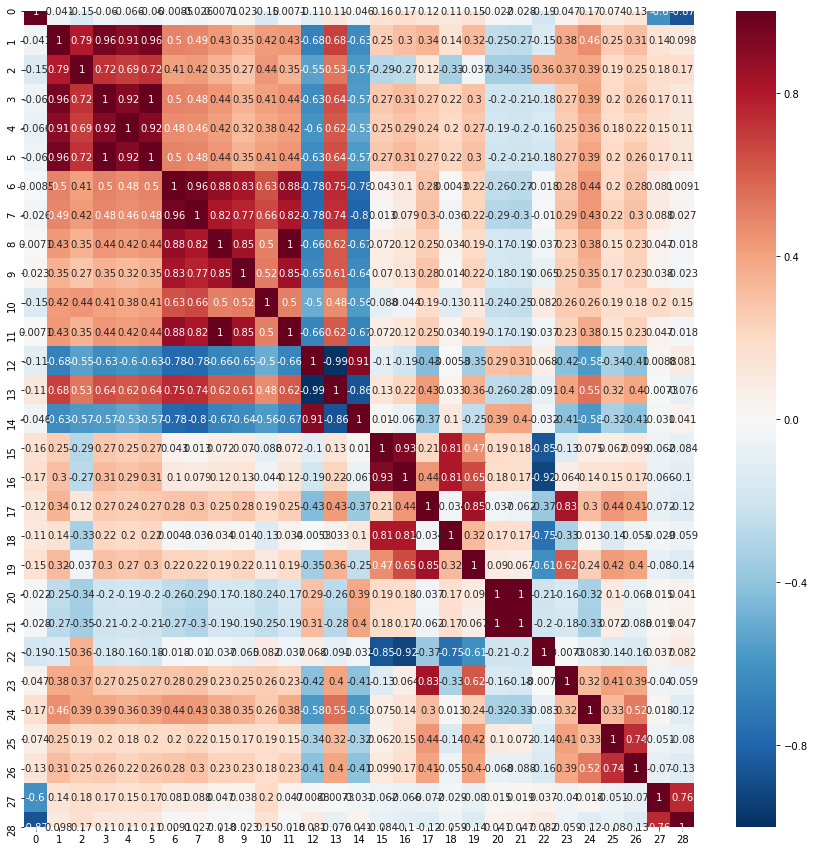

In [69]:
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r");

In [70]:
y_train = data[28].values
data.drop(28, axis=1, inplace=True,)

[23 23 23 ...  1  1  1]


In [72]:
#Scaling
scale_cols = sklearn.preprocessing.StandardScaler().fit(data)
X_train_scaled = scale_cols.transform(data)

#Scaling
scale_test_cols = sklearn.preprocessing.StandardScaler().fit(test_data)
X_test_scaled = scale_test_cols.transform(test_data)
print(X_test_scaled.shape)
print(y_test.shape)

#K fold
strat_kfold = sklearn.model_selection.StratifiedKFold(5, random_state=0,)

(168, 28)
(1040,)


In [75]:
#Linear Regression
linear_regression = sklearn.linear_model.LinearRegression()

estimator = sklearn.model_selection.GridSearchCV(
    linear_regression,
    param_grid={
        "fit_intercept": [True, False,],
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
print(y_test_predicted)

best params {'fit_intercept': True}
Root Mean Squared 0.19136380845372858
Mean absolute error 0.1578067033215468
Performance on testing data
[ 1.03740372  1.17610689  1.12628886  1.24106293  1.18795173  1.15768089
  0.97765757  0.9241811   0.96167401  0.88853781  0.90408717  0.9096339
  1.2101849   1.02768857  1.09734165  1.1473357   1.02287992  1.07275019
  1.00945835  1.00557738  1.19422549  0.99390428  1.12997922  1.27056157
  0.94178966  0.88639741  1.15350683  1.08031832  1.11690645  0.99325727
  0.8127085   0.73044695  0.79531015  0.91974616  0.8497983   0.8627274
  0.83197047  0.7545051   0.8068592   0.75631456  0.62829888  0.56588581
  0.84311594  0.74124417  0.85331576  0.5979017   0.76615958  0.86086255
  0.64457354  0.74140707  0.69075961  0.77865083  0.67109468  0.70293605
  0.63136744  0.63136744  0.75707646  0.57911666  0.68245026  0.60100929
  0.70988205  0.58284891  0.55180838  0.65430469  0.56674582  0.6531539
  0.67180772  0.56159286  0.64983608  0.66221908  0.6625107

In [ ]:
#Decision Tree Regression
md = [1,2,3,4,5,10,15,20,25,30,35,40]
dt_model = sklearn.tree.DecisionTreeRegressor(random_state=0)
splitter=['best', 'random']
estimator = sklearn.model_selection.GridSearchCV(
    dt_model,
    param_grid={
        "splitter": ['best', 'random'],
        "max_depth": md,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)

In [ ]:
#Random forest regression
md = [5,10,15,20,25,30,35,40]
ne = [20,25,30,35,40,45,47,50]
rf_model = sklearn.ensemble.RandomForestRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    rf_model,
    param_grid={
        "n_estimators": ne,
        "max_depth": md,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)
# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)


In [ ]:
#Ada boost ensemble
ne=[10,20,30,40,50,60,70]
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0]
ab_model = sklearn.ensemble.AdaBoostRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    ab_model,
    param_grid={
        "n_estimators": ne,
        "learning_rate": lr,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)


In [ ]:
#Gaussian Process regression
ker = [DotProduct(), WhiteKernel(), RBF()]
gp = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    gp,
    param_grid={
        "kernel": ker,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)


In [ ]:
#Neural Network Regression
hls = [(),(8),(10),(11),(12)]
a = ['identity', 'tanh', 'relu']
s = ['lbfgs', 'sgd', 'adam']
nn = sklearn.neural_network.MLPRegressor()
estimator = sklearn.model_selection.GridSearchCV(
    nn,
    param_grid={
        "hidden_layer_sizes": hls,
        "activation": a,
        "solver": s,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)

In [ ]:
#SVM Regression
ker = ['rbf','linear','sigmoid']
svm_model = sklearn.svm.SVR()
estimator = sklearn.model_selection.GridSearchCV(
    svm_model,
    param_grid={
        "kernel": ker,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)